# Geometric Transformation

In this notebook, we will learn geometric transformation of images in OpenCV-Python and how to get a transformation matrix given input and output points.

---

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

## Practice: Track advertisement

Given an image of track and Coca-cola logo, you overlay the logo on box of the track 2

- Find homography matrix from the logo image to the track box using `cv2.getPerspectiveTransform()` method.
- Overlay the logo on the output image using `cv2.warpPerspective()` method.

Here's input images and sample outputs:

<img src="../images/track_results.png" width="800"/>

[[  6.86234373e-02  -1.23795605e+00   6.71000000e+02]
 [  8.64610775e-02   4.81511041e-02   3.14000000e+02]
 [ -7.61361584e-04  -3.67363232e-04   1.00000000e+00]]


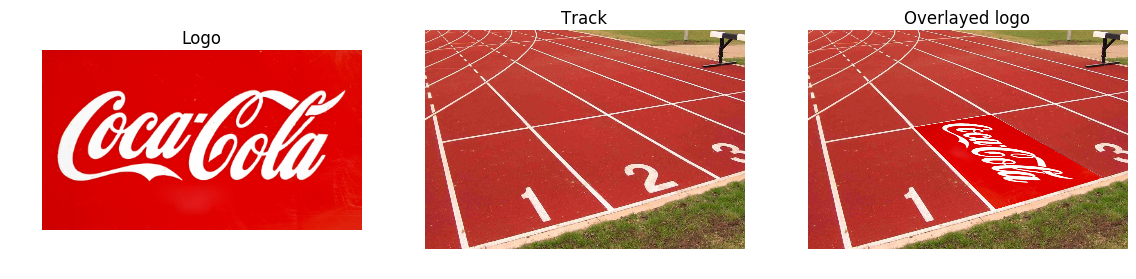

In [2]:
# Homography(Perspective Transformation)
img_track = cv2.imread('../images/track.jpg')
img_logo = cv2.imread('../images/logo.jpg')
img_output = np.copy(img_track)

# ============ YOUR CODE HERE ============
# Overlay the logo on the track(img_output)
# Four corner points of the track 2 are (671,314), (1084,546), (689,663), (386,361)
rows1,cols1,_ = img_track.shape
rows2,cols2,_ = img_logo.shape
pts1 = np.float32([(0,0),(cols2,0),(cols2,rows2),(0,rows2)])
pts2 = np.float32([(671,314),(1084,546),(689,663),(386,361)])

M = cv2.getPerspectiveTransform(pts1,pts2)
print M
cv2.warpPerspective(img_logo, M, (cols1,rows1), img_output, borderMode=cv2.BORDER_TRANSPARENT)
# ========================================

plt.figure(figsize=(14,3))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_logo, cv2.COLOR_BGR2RGB)); plt.title('Logo'); plt.axis('off');
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_track, cv2.COLOR_BGR2RGB)); plt.title('Track'); plt.axis('off');
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)); plt.title('Overlayed logo'); plt.axis('off');

## Practice: Cam Scanner

Given an image of a document captured by smartphone camera, find the corner of the document and crop it.

- Using Hough line detector, find four sides of the paper.  
(You should tune the parameters to find exactly four lines)  
- Find four corners of the paper by computing the intersections of the lines.  
(You should do some math)  
- Set output size and get homography matrix from the corners to the output image.
- Crop with the matrix.

Here's input image and sample outputs:

<img src="../images/paper_results.png" width="900"/>

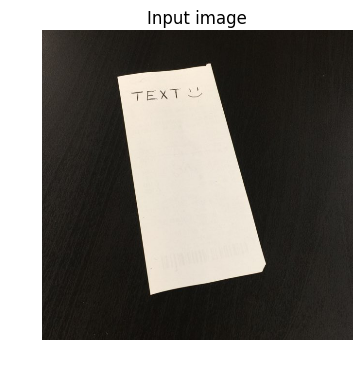

In [3]:
# Here's the input image
img = cv2.imread('../images/paper.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Input image'); plt.axis('off');

[[[-313.            2.86233997]]

 [[-143.            3.00196624]]

 [[ 581.            1.36135685]]

 [[ 111.            1.46607661]]]


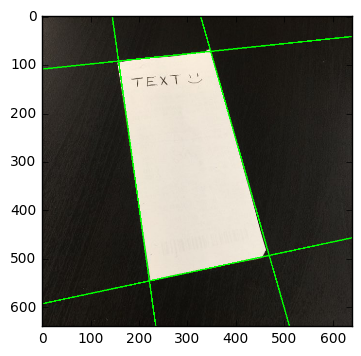

In [4]:
# Perform Hough line transform
img2 = cv2.Canny(img, 50, 150)
lines = cv2.HoughLines(img2, 2, 2*np.pi/180, 100)
print lines

# Draw results
temp_img = np.copy(img)
for line in lines:
    rho, theta = line[0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c*rho
    y0 = s*rho
    # Endpoints that are roughly outside of the image
    x1 = int(x0 + 1000*(-s))
    y1 = int(y0 + 1000*(c))
    x2 = int(x0 - 1000*(-s))
    y2 = int(y0 - 1000*(c))
    cv2.line(temp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB));
img_lines = temp_img

(467.44415767603766, 494.6215511462122)
(347.15517310193417, 75.123955400734246)
(221.27372785362783, 546.9466830385627)
(157.76096038682942, 95.030081304970636)


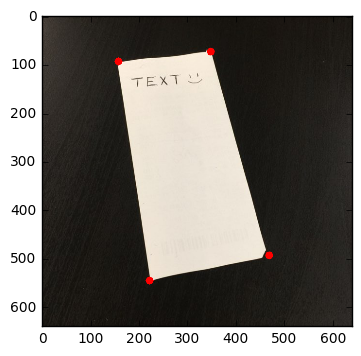

In [5]:
rows, cols, _ = img.shape
# For each pair of lines, find the intersection point
temp_img = np.copy(img)
points = []
for i in range(len(lines)):
    for j in range(i+1, len(lines), 1):
        rho1, theta1 = lines[i][0]
        rho2, theta2 = lines[j][0]
        # y = a*x + b
        a1 = -1.0/np.tan(theta1)
        b1 = rho1/np.sin(theta1)
        a2 = -1.0/np.tan(theta2)
        b2 = rho2/np.sin(theta2)
        # Intersect point
        x = -(b1-b2)/(a1-a2)
        y = (a1*b2-a2*b1)/(a1-a2)
        # If the point is inside the image, that is the corner.
        if x >= 0 and x <= cols and y >= 0 and y <= rows:
            print((x, y))
            points.append((x, y))
            cv2.circle(temp_img, (int(x), int(y)), 8, (0, 0, 255), -1)
            
# Draw results
plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB));
img_corners = temp_img

In [6]:
# Define output image np array
r_out, c_out = (400, 200)
output = np.zeros([r_out, c_out, 3], dtype=np.uint8)

# Get perspective matrix
src = np.float32(points)
dst = np.float32([(c_out, r_out), (c_out, 0), (0, r_out), (0, 0)])  # order manually
M = cv2.getPerspectiveTransform(src, dst)
print M

[[  1.04702218e+00  -1.47149463e-01  -1.51195595e+02]
 [  1.29122073e-01   1.22851491e+00  -1.37116295e+02]
 [ -1.57714249e-04   8.10620013e-04   1.00000000e+00]]


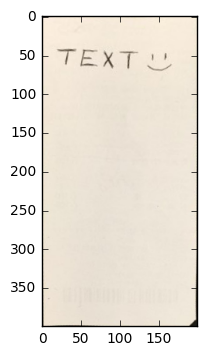

In [7]:
# Warp!
cv2.warpPerspective(img, M, (c_out, r_out), output)

# Draw output
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))